In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [35]:
# dataset source https://finance.yahoo.com/quote/%5ESP500TR/history?period1=568278000&period2=1548226800&interval=1d&filter=history&frequency=1d
# historical daily prices for S&P 500 TR (total return) index
# NOTE: Adj Close factors in dividends, so that's a more accurate measure of returns
df = pd.read_csv('SP500TR.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1988-01-04,256.019989,256.019989,256.019989,256.019989,256.019989,0
1,1988-01-05,258.769989,258.769989,258.769989,258.769989,258.769989,0
2,1988-01-06,259.029999,259.029999,259.029999,259.029999,259.029999,0
3,1988-01-07,261.209991,261.209991,261.209991,261.209991,261.209991,0
4,1988-01-08,243.550003,243.550003,243.550003,243.550003,243.550003,0


In [36]:
returns = np.ediff1d(df['Adj Close'].values)  # take Closing value (today) - Closing value (yesterday)
pct_returns = returns / df['Adj Close'].values[:-1]  # convert to % by dividing by Closing value (yesterday)
pct_returns

array([ 0.01074135,  0.00100479,  0.00841598, ...,  0.00768998,
        0.01321134, -0.0141172 ])

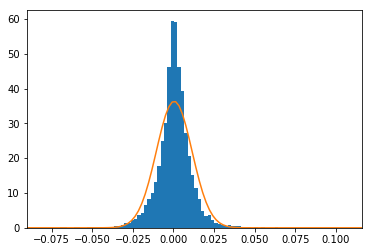

In [52]:
# plot histogram compared to Gaussian.  Looks like this is not a Gaussian!
# in fact it is probably a Laplace distribution
# https://sixfigureinvesting.com/2016/03/modeling-stock-market-returns-with-laplace-distribution-instead-of-normal/
plt.figure(1)
plt.hist(pct_returns, bins=100, density=True)
plt.xlim((min(pct_returns), max(pct_returns)))

# calculate fitted Gaussian
mean = np.mean(pct_returns)
variance = np.var(pct_returns)
sigma = np.sqrt(variance)
x = np.linspace(min(pct_returns), max(pct_returns), 100)
plt.plot(x, scipy.stats.norm.pdf(x, mean, sigma))

plt.show()

In [45]:
# returns have LONG tails.  "Outlier" evens definitely happen (i.e. catastrophic market crashes)
# kurtosis=3 would be Gaussian.  Anything larger has fat tails
from scipy.stats import kurtosis

kurtosis(pct_returns)

8.946295841519206

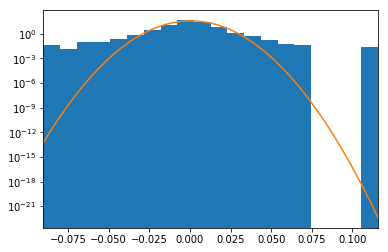

In [54]:
# plot again on log scale to really show those fat tails

plt.figure(1)
plt.hist(pct_returns, bins=20, density=True)
plt.xlim((min(pct_returns), max(pct_returns)))

# calculate fitted Gaussian
mean = np.mean(pct_returns)
variance = np.var(pct_returns)
sigma = np.sqrt(variance)
x = np.linspace(min(pct_returns), max(pct_returns), 100)
plt.plot(x, scipy.stats.norm.pdf(x, mean, sigma))

plt.yscale('log')
plt.show()